In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

In [2]:
feat_file=pd.read_csv('cancer_mordred_preprocessed.csv')

In [3]:
feat_file.head()

,ABC,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VE2_A,VR1_A,VR3_A,...,JGI9,JGI10,JGT10,Diameter,TopoShapeIndex,SRW03,SRW05,TSRW10,WPath,mZagreb1
0,0.121378,0.0,0.0,0.165387,0.722883,0.785705,0.625380,0.172377,0.000007,0.325947,...,0.000000,0.000000,0.570573,8.000000e-08,0.60,0.0,0.000000,0.255696,1.210999e-09,0.142857
1,0.187982,0.2,0.2,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.460767,0.614607,0.593865,1.000000e+00,0.00,0.0,0.555084,0.412322,1.242729e-02,0.133016
2,0.161982,0.0,0.0,0.232151,0.766968,0.882304,0.685177,0.152569,0.000011,0.359675,...,0.000000,0.000000,0.431425,8.000000e-08,1.00,0.0,0.000000,0.335127,1.919619e-09,0.125236
3,0.150052,0.1,0.0,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.000000,0.000000,0.502729,1.000000e+00,0.00,0.0,0.437189,0.361216,1.586462e-02,0.153556
4,0.073037,0.0,0.0,0.115319,0.672574,0.876552,0.525463,0.248485,0.000004,0.264019,...,0.000000,0.000000,0.267857,7.000000e-08,0.75,0.0,0.000000,0.204382,3.516658e-10,0.053493


In [4]:
feat_file.shape

(2129, 820)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 820)

In [10]:
y_train.shape

(1703,)

In [11]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
import pickle
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from keras.models import Sequential, Model
from keras import optimizers, regularizers, initializers
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

2023-04-25 14:41:12.406401: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 14:41:19.904884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
import numpy as np
import time
import random
import os

from sklearn.preprocessing import normalize 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

import matplotlib.pyplot as plt
from matplotlib import gridspec

from activeSVC import min_complexity, min_acquisition,min_complexity_cv, min_acquisition_cv,min_complexity_h5py, min_acquisition_h5py
import pandas as pd
import pickle
import os, psutil

In [13]:
def text_create(path, name, msg):
    full_path = path + "/" + name + '.pickle'
    f=open(full_path,'wb') 
    pickle.dump(msg,f)
    f.close()

class TimerError(Exception):
     """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Total run time: {elapsed_time:0.4f} seconds")
        return elapsed_time

In [14]:
l=[30,25,20,15,10,5]
len_features =[]
features =[]
for i in l:
    num_features = i
    num_samples=100
    init_samples=200

    if __name__ == '__main__':

        t=Timer()
        t.start()
        feature_selected, num_samples_list, samples_global, train_errors,test_errors,train_scores,test_scores,step_times= min_acquisition(
           X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples, init_samples=init_samples)
        elapsed_time=t.stop()
        
        features.append(feature_selected)
        len_features.append(len(feature_selected))
        
print(len_features)

Elapsed time: 6.2093 seconds
feature 0 : gene [314]  200 samples
training error=0.4838520258367587 test error=0.49061032863849763
training accuracy=0.5161479741632413 test accuracy=0.5093896713615024
Elapsed time: 6.3032 seconds
feature 1 : gene 91  203 samples
training error=0.48091603053435117 test error=0.49061032863849763
training accuracy=0.5190839694656488 test accuracy=0.5093896713615024
Elapsed time: 6.2778 seconds
feature 2 : gene 72  203 samples
training error=0.4768056371109806 test error=0.5187793427230047
training accuracy=0.5231943628890193 test accuracy=0.4812206572769953
Elapsed time: 5.1935 seconds
feature 3 : gene 388  213 samples
training error=0.4697592483852026 test error=0.5093896713615024
training accuracy=0.5302407516147974 test accuracy=0.49061032863849763
Elapsed time: 4.6900 seconds
feature 4 : gene 715  214 samples
training error=0.46858485026423957 test error=0.5046948356807511
training accuracy=0.5314151497357604 test accuracy=0.4953051643192488
Elapsed ti

Elapsed time: 3.9226 seconds
feature 12 : gene 300  272 samples
training error=0.3634762184380505 test error=0.3755868544600939
training accuracy=0.6365237815619496 test accuracy=0.6244131455399061
Elapsed time: 4.2216 seconds
feature 13 : gene 176  280 samples
training error=0.35877862595419846 test error=0.3779342723004695
training accuracy=0.6412213740458015 test accuracy=0.6220657276995305
Elapsed time: 3.5802 seconds
feature 14 : gene 214  281 samples
training error=0.357017028772754 test error=0.38028169014084506
training accuracy=0.642982971227246 test accuracy=0.6197183098591549
Elapsed time: 4.4360 seconds
feature 15 : gene 313  282 samples
training error=0.3452730475631239 test error=0.37089201877934275
training accuracy=0.6547269524368761 test accuracy=0.6291079812206573
Elapsed time: 4.7267 seconds
feature 16 : gene 44  285 samples
training error=0.33940105695830886 test error=0.3779342723004695
training accuracy=0.6605989430416911 test accuracy=0.6220657276995305
Elapsed t

Elapsed time: 1.7054 seconds
feature 9 : gene 565  274 samples
training error=0.3658250146799765 test error=0.39436619718309857
training accuracy=0.6341749853200235 test accuracy=0.6056338028169014
Elapsed time: 1.7132 seconds
feature 10 : gene 354  279 samples
training error=0.36523781561949503 test error=0.39436619718309857
training accuracy=0.634762184380505 test accuracy=0.6056338028169014
Elapsed time: 2.3488 seconds
feature 11 : gene 238  279 samples
training error=0.362889019377569 test error=0.3779342723004695
training accuracy=0.637110980622431 test accuracy=0.6220657276995305
Elapsed time: 2.3092 seconds
feature 12 : gene 701  281 samples
training error=0.357017028772754 test error=0.3826291079812207
training accuracy=0.642982971227246 test accuracy=0.6173708920187794
Elapsed time: 1.5726 seconds
feature 13 : gene 574  288 samples
training error=0.35525543159130946 test error=0.3779342723004695
training accuracy=0.6447445684086905 test accuracy=0.6220657276995305
Elapsed time

Process ForkPoolWorker-4280:
Process ForkPoolWorker-95:
Process ForkPoolWorker-4309:
Process ForkPoolWorker-4320:
Process ForkPoolWorker-4314:
Process ForkPoolWorker-2909:
Process ForkPoolWorker-2912:
Process ForkPoolWorker-4316:
Process ForkPoolWorker-68:
Process ForkPoolWorker-4290:
Process ForkPoolWorker-4302:
Process ForkPoolWorker-4292:
Process ForkPoolWorker-4291:
Process ForkPoolWorker-4277:
Process ForkPoolWorker-2916:
Process ForkPoolWorker-196:
Process ForkPoolWorker-4315:
Process ForkPoolWorker-55:
Process ForkPoolWorker-237:
Process ForkPoolWorker-4311:
Process ForkPoolWorker-4299:
Process ForkPoolWorker-4283:
Process ForkPoolWorker-56:
Process ForkPoolWorker-2914:
Process ForkPoolWorker-4298:
Process ForkPoolWorker-4297:
Process ForkPoolWorker-2923:
Process ForkPoolWorker-2883:
Process ForkPoolWorker-4294:
Process ForkPoolWorker-4313:
Process ForkPoolWorker-2913:
Process ForkPoolWorker-2924:
Process ForkPoolWorker-2927:
Process ForkPoolWorker-2891:
Process ForkPoolWorker-4

Traceback (most recent call last):
Process ForkPoolWorker-62:
Traceback (most recent call last):
Process ForkPoolWorker-807:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-650:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-4306:
Process ForkPoolWorker-797:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-803:
Traceback (most recent call last):
Process ForkPoolWorker-217:
Process ForkPoolWorker-72:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-88:
Traceback (most recent call last):
Process ForkPoolWorker-646:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most rec

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Tra

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108,

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/py

KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/as

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.1

KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 365, in get
    res = self._reader.recv_bytes()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlo

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessin

Process ForkPoolWorker-73:
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process ForkPoolWorker-204:
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-649:
Process ForkPoolWorker-780:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process ForkPoolWorker-225:
Process ForkPoolWorker-813:
Traceback (most recent call last):
Process ForkPoolWorker-71:
Traceback (most recent call last):
Process ForkPoolWorker-69:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/m

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
 

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiproc

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py",

KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
  

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/py

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/py

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/

  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/ahujalab4/.conda/envs/asvm/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
Keyboar

In [15]:
print(features)

[[314, 91, 72, 388, 715, 448, 396, 247, 151, 716, 666, 672, 331, 371, 574, 82, 264, 706, 725, 446, 565, 261, 70, 562, 577, 468, 365, 39, 189, 726], [503, 761, 565, 762, 561, 418, 209, 558, 501, 121, 68, 253, 300, 176, 214, 313, 44, 316, 771, 776, 704, 23, 599, 707, 748], [111, 157, 565, 567, 518, 140, 709, 705, 13, 794, 771, 666, 2, 692, 204, 550, 61, 552, 425, 132], [2, 147, 471, 518, 726, 666, 210, 265, 790, 565, 354, 238, 701, 574, 365], [396, 348, 600, 813, 685, 44, 689, 16, 677, 445], [33, 457, 102, 238, 157]]


In [16]:
feat_30= features[0]
feat_25= features[1]
feat_20= features[2]
feat_15= features[3]
feat_10= features[4]
feat_5=features[5]

In [17]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [19]:
train_x.columns=feat_file.columns
test_x.columns=feat_file.columns

In [20]:
selected_feat_names_30 = list(feat_file.columns[feat_30])
selected_feat_names_25=list(feat_file.columns[feat_25])
selected_feat_names_20=list(feat_file.columns[feat_20])
selected_feat_names_15=list(feat_file.columns[feat_15])
selected_feat_names_10=list(feat_file.columns[feat_10])
selected_feat_names_5=list(feat_file.columns[feat_5])

In [21]:
df_30=train_x.loc[:,selected_feat_names_30]
df_25=train_x.loc[:,selected_feat_names_25]
df_20=train_x.loc[:,selected_feat_names_20]
df_15=train_x.loc[:,selected_feat_names_15]
df_10=train_x.loc[:,selected_feat_names_10]
df_5=train_x.loc[:,selected_feat_names_5]

In [22]:
df_30_test=test_x.loc[:,selected_feat_names_30]
df_25_test=test_x.loc[:,selected_feat_names_25]
df_20_test=test_x.loc[:,selected_feat_names_20]
df_15_test=test_x.loc[:,selected_feat_names_15]
df_10_test=test_x.loc[:,selected_feat_names_10]
df_5_test=test_x.loc[:,selected_feat_names_5]

In [23]:
X_30=df_30
X_25=df_25
X_20=df_20
X_15=df_15
X_10=df_10
X_5=df_5

In [25]:
df_30.to_csv('min_acqui_20(30)_train.csv',index=False)
df_25.to_csv('min_acqui_20(25)_train.csv',index=False)
df_20.to_csv('min_acqui_20(20)_train.csv',index=False)
df_15.to_csv('min_acqui_20(15)_train.csv',index=False)
df_10.to_csv('min_acqui_20(10)_train.csv',index=False)
df_5.to_csv('min_acqui_20(5)_train.csv',index=False)


In [26]:
df_30_test.to_csv('min_acqui_20(30)_test.csv',index=False)
df_25_test.to_csv('min_acqui_20(25)_test.csv',index=False)
df_20_test.to_csv('min_acqui_20(20)_test.csv',index=False)
df_15_test.to_csv('min_acqui_20(15)_test.csv',index=False)
df_10_test.to_csv('min_acqui_20(10)_test.csv',index=False)
df_5_test.to_csv('min_acqui_20(5)_test.csv',index=False)
                  
#########saving files dont confuse with the code#####

,MATS2p,AATS3p,AATS1v,GATS6p,MDEC-24,Xch-7d,GATS6i,AATSC1pe,ATSC4v,MDEC-33,...,MAXdsN,AATSC4i,AATS8Z,MAXaaNH,MAXdsssP,AXp-5d,GATS7Z,AATS3dv,AATSC5c,MDEN-23
0,0.563621,0.248465,0.334407,0.098366,0.332691,0.087045,0.296169,0.563457,0.103642,1.003410e-01,...,0.475173,0.576098,0.010728,0.51956,0.536079,0.133530,0.143576,0.039087,0.203298,0.132781
1,0.467242,0.333743,0.475504,0.135016,0.164418,0.046274,0.399522,0.638558,0.376341,1.441569e-01,...,0.475173,0.577754,0.023763,0.51956,0.536079,0.161770,0.143436,0.135338,0.202451,0.132781
2,0.319751,0.126991,0.201854,0.121678,0.164418,0.000000,0.343088,0.498237,0.570025,3.861375e-03,...,0.475173,0.650535,0.000000,0.51956,0.536079,0.394496,0.228654,0.022676,0.201035,0.132781
3,0.321129,0.223043,0.357732,0.102175,0.164418,0.012506,0.251671,0.653065,0.454680,9.931853e-02,...,0.475173,0.616274,0.020514,0.51956,0.536079,0.316434,0.000000,0.090077,0.191263,0.132781
4,0.648580,0.390725,0.304955,0.114636,0.164418,0.000000,0.325497,0.599697,0.295267,4.633650e-10,...,0.475173,0.507932,0.020514,0.51956,0.536079,0.251370,0.149289,0.003685,0.204729,0.132781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,0.554441,0.215284,0.307886,0.123605,0.098948,0.170780,0.364625,0.562368,0.319009,5.099992e-02,...,0.475173,0.569611,0.020514,0.51956,0.536079,0.157373,0.000000,0.028061,0.205902,0.132781
1699,0.574642,0.244724,0.338154,0.133390,0.127468,0.078539,0.399345,0.546684,0.274782,1.637535e-01,...,0.475173,0.586358,0.009160,0.51956,0.536079,0.136776,0.130070,0.053878,0.205679,0.132781
1700,0.523512,0.346861,0.479399,0.001382,0.164418,0.078871,0.146445,0.528759,0.390741,4.366845e-01,...,0.630085,0.594363,0.038256,0.51956,0.536079,0.158545,0.156835,0.197202,0.222639,0.132781
1701,0.236346,0.303308,0.358698,0.119391,0.164418,0.000000,0.024186,0.557489,0.496500,9.931853e-02,...,0.475173,0.560680,0.020514,0.51956,0.536079,0.664492,0.149289,0.007685,0.202276,0.132781


In [28]:
from sklearn import datasets
from sklearn.cluster import KMeans
#from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
#from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE



In [44]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_30)
y_pred = km.labels_

####
from sklearn.metrics import silhouette_score
score = silhouette_score(X_30,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

####
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})
data
##

,Clustering_scores,Scores
0,silhouette_score,0.005158
1,adjusted_rand_score,0.003354
2,normalized_mutual_info_score,0.003471


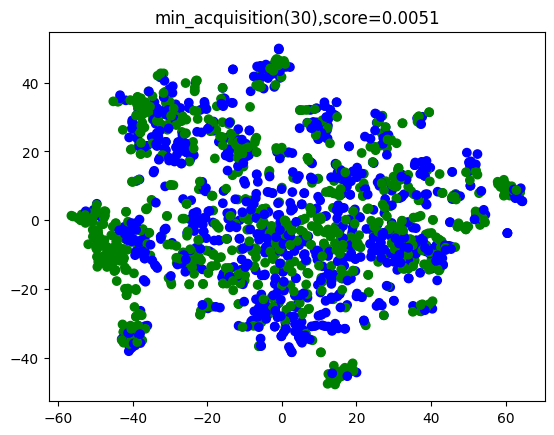

In [45]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0,)
X_tsne = tsne.fit_transform(X_30)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('min_acquisition(30),score=0.0051')
plt.show()


# X_25

In [46]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_25)
y_pred = km.labels_

####
from sklearn.metrics import silhouette_score
score = silhouette_score(X_25,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

####
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})
data
##

,Clustering_scores,Scores
0,silhouette_score,0.007711
1,adjusted_rand_score,0.005868
2,normalized_mutual_info_score,0.006160


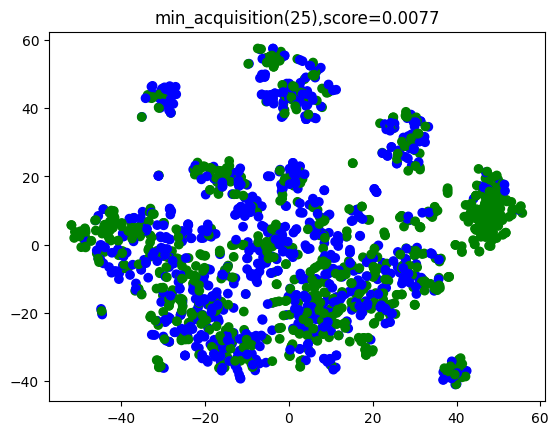

In [47]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0,)
X_tsne = tsne.fit_transform(X_25)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('min_acquisition(25),score=0.0077')
plt.show()


# X_20

In [48]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_20)
y_pred = km.labels_

####
from sklearn.metrics import silhouette_score
score = silhouette_score(X_20,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

####
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})
data
##

,Clustering_scores,Scores
0,silhouette_score,0.012355
1,adjusted_rand_score,0.001597
2,normalized_mutual_info_score,0.001622


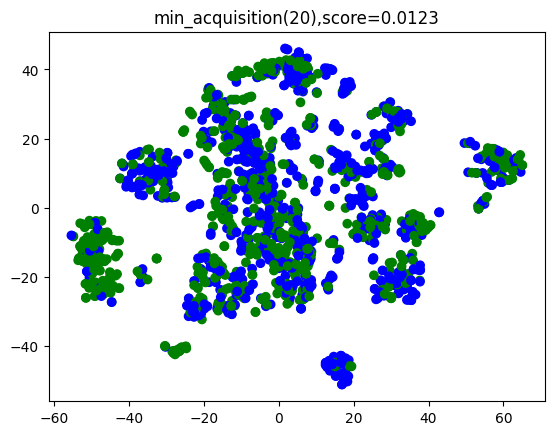

In [49]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0,)
X_tsne = tsne.fit_transform(X_20)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('min_acquisition(20),score=0.0123')
plt.show()


# X_15

In [50]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_15)
y_pred = km.labels_

####
from sklearn.metrics import silhouette_score
score = silhouette_score(X_15,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

####
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})
data
##

,Clustering_scores,Scores
0,silhouette_score,0.012858
1,adjusted_rand_score,-0.000432
2,normalized_mutual_info_score,0.003658


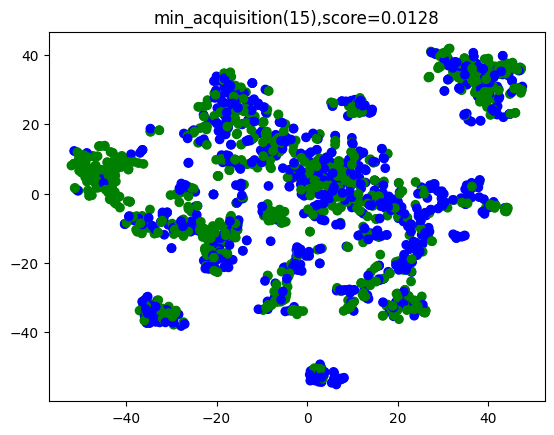

In [51]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0,)
X_tsne = tsne.fit_transform(X_15)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('min_acquisition(15),score=0.0128')
plt.show()


# X_10

In [52]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_10)
y_pred = km.labels_

####
from sklearn.metrics import silhouette_score
score = silhouette_score(X_10,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

####
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})
data

,Clustering_scores,Scores
0,silhouette_score,0.013470
1,adjusted_rand_score,0.010578
2,normalized_mutual_info_score,0.011902


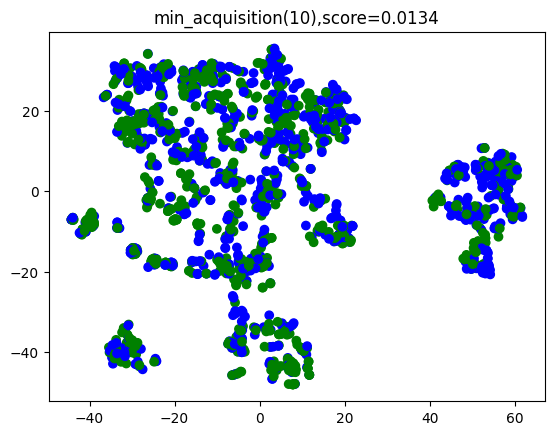

In [53]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0,)
X_tsne = tsne.fit_transform(X_10)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('min_acquisition(10),score=0.0134')
plt.show()

# X_5

In [54]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_5)
y_pred = km.labels_

####
from sklearn.metrics import silhouette_score
score = silhouette_score(X_5,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

####
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})
data

,Clustering_scores,Scores
0,silhouette_score,0.019335
1,adjusted_rand_score,0.015515
2,normalized_mutual_info_score,0.019397


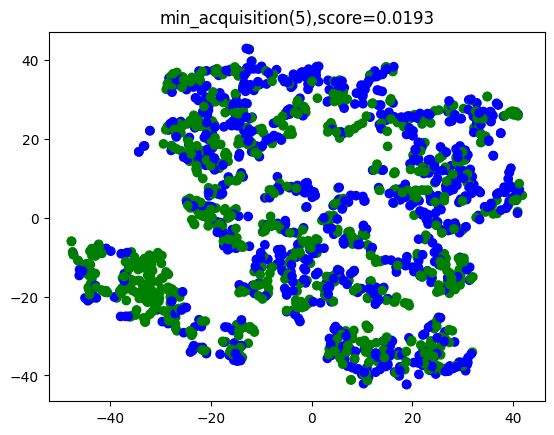

In [55]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0,)
X_tsne = tsne.fit_transform(X_5)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('min_acquisition(5),score=0.0193')
plt.show()